<a href="https://colab.research.google.com/github/PedemonteGiacomo/DataScienceProject/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Progetto Introduzione alla Data Science***

Pedemonte Giacomo S4861715

***Importazione librerie per ambiente di lavoro:***

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt #libreria grafica da usare dopo il calcolo dell'istogramma, grazie anche a numpy(np) 
import numpy as np
!pip install scipy==1.7.0
import scipy.stats as stats
import scipy
print (scipy.__version__)

1.7.0


***Analisi ed estrazione dei Dati***

Importazione e visualizzazione della "testa" del database contenente la playlist spotify: top50 del 2019





In [2]:
top50 = pd.read_csv('top50.csv')
top50.head()

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
top50.shape

(50, 14)

In [4]:
top50.describe()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Andiamo a vedere ora quante canzoni ci sono per genere in questa top50 andando a visualizzare il tutto con un istogramma:

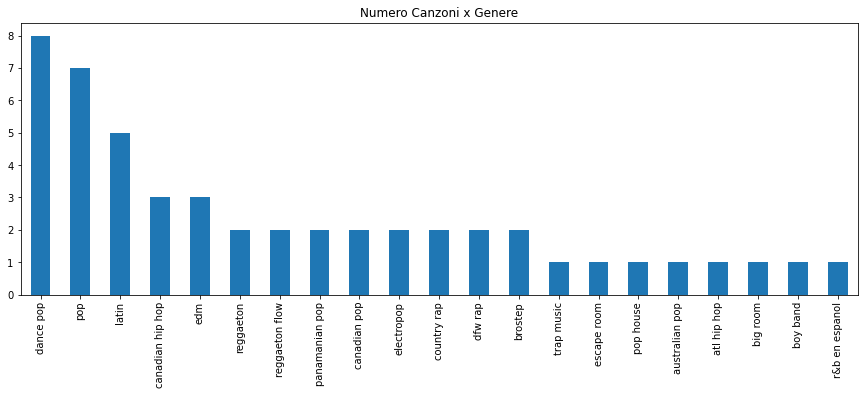

In [5]:
num_genre = top50['Genre'].value_counts()
num_genre.plot(kind = 'bar',title = 'Numero Canzoni x Genere', fontsize = 10, figsize = (15,5))

Vediamo quante canzoni diverse ci sono per ogni artista presente nella playlist:

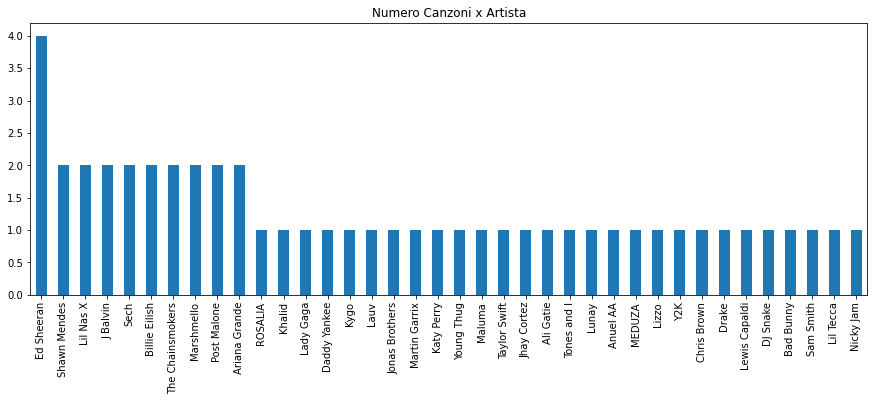

In [6]:
num_artist_name = top50['Artist.Name'].value_counts()
num_artist_name.plot(kind = 'bar',title = 'Numero Canzoni x Artista', fontsize = 10, figsize = (15,5))

Vediamo subito in questo modo che il genere più presente nella top50 del 2019 era il dance pop.
Ci possiamo anche però porre se fosse il più popolare e quindi dobbiamo vedere un istrogramma della popolarità delle canzoni raggruppandole per genere:

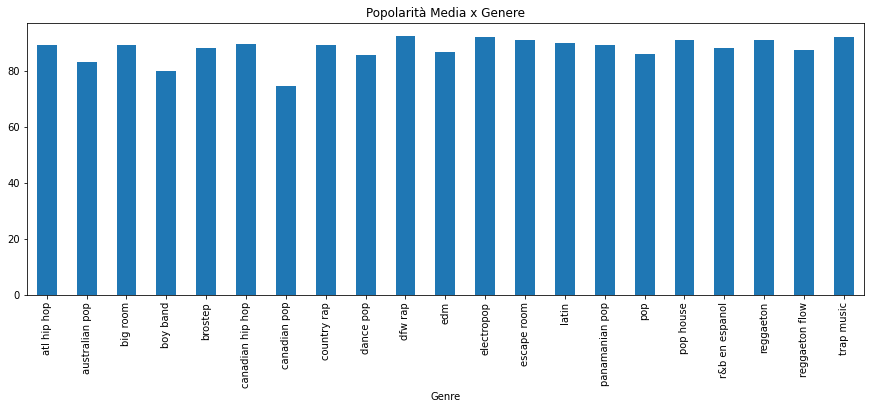

In [7]:
top50.groupby('Genre')['Popularity'].mean().plot(kind='bar',title = 'Popolarità Media x Genere', fontsize = 10, figsize = (15,5))

Da questo grafico si evince che il dance pop, il genere che presenta più canzoni nella top50, non è quello che ha la media di popularità più alta.

Vediamo quindi quale genere ha la media più alta di posizionamento in questa top50:

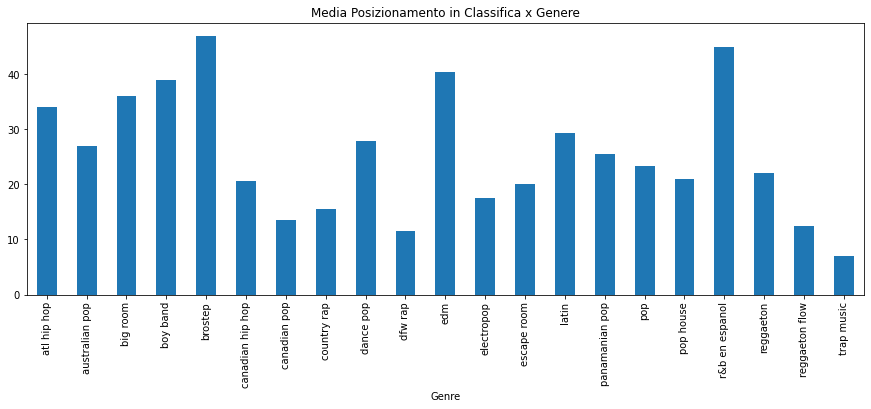

In [8]:
top50.groupby('Genre')['Position'].mean().plot(kind='bar',title = 'Media Posizionamento in Classifica x Genere', fontsize = 10, figsize = (15,5))

In questo caso si vede come il genere "messo meglio" in classifica con una media del posizionamento è il genere: trap music

Ora andiamo a vedere le analogie tra genere e Beats Per Minuto:

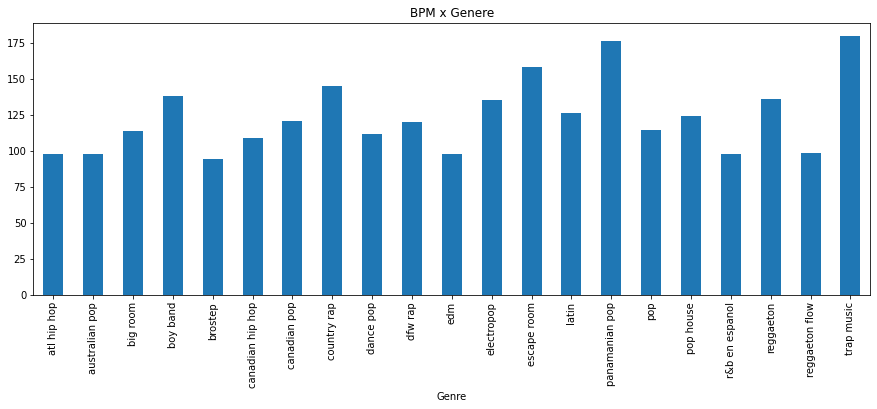

In [9]:
top50.groupby('Genre')['Beats.Per.Minute'].mean().plot(kind='bar',title = 'BPM x Genere', fontsize = 10, figsize = (15,5))

Si evince dal grafico soprastante che il genere con più battiti è la trap music.

Andremo poi a studiare se e come infuisce il numero di battiti per minuto con la popolarità della canzone dato che il genere con il più alto numero di bpm è anche il genere piazzato meglio mediamente nella top50 analizzata.

Analizziamo ora qual'è il genere con il maggior numero di parole diverse utilizzate all'intero della canzone: 

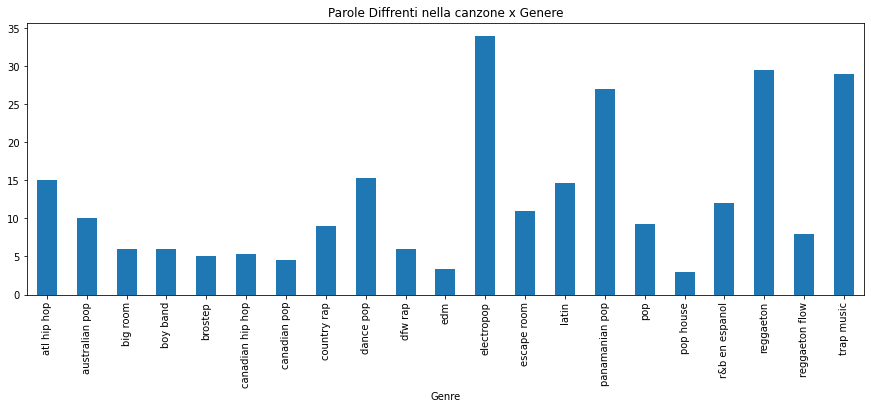

In [10]:
top50.groupby('Genre')['Speechiness.'].mean().plot(kind='bar',title = 'Parole Diffrenti nella canzone x Genere', fontsize = 10, figsize = (15,5))

Si vede bene come sia l'electropop il genere che presenta più parole differenti all'interno dei testi delle canzoni.

In questi grafici a dispersione cerchiamo di capire maggiormente se c'è un possibile legame tra gli attributi e la popolarità:

***BPM to Popularity***

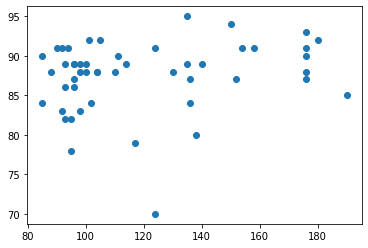

In [11]:
plt.scatter(top50['Beats.Per.Minute'],top50['Popularity'])

Si può dire che all'aumentare dei BPM non aumenta la pooplarità, però si riesce ad estrarre l'informazione che la maggior parte delle canzoni presenti nella playlist che hanno un numero di BPM tra 80 e 120 hano una popolarità abbastanza coesa, mentre più aumenta il valore di BPM e più questa coesione viene meno.

***Position to Popularity***

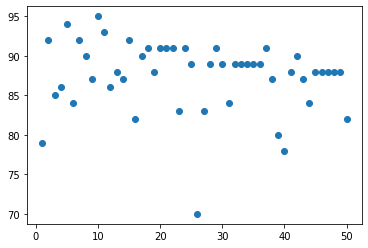

In [12]:
plt.scatter(top50['Position'],top50['Popularity'])

Si riesce ad estrapolare il dato che la canzone prima in classifica non è la più popolare! Quella più popolare si trova circa al decimo posto, un fatto curioso!

***Energy to Popularity***

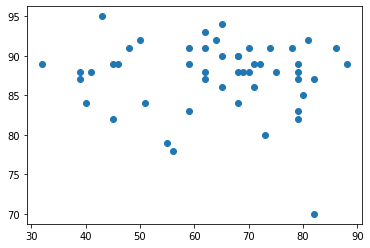

In [13]:
plt.scatter(top50['Energy'],top50['Popularity'])

L'energia della popolarità non sembra essere molto legato alla popolarità, a praticamente qualsiasi livello di energia troviamo un valori di energia coesi.

***Danceability to Popularity***

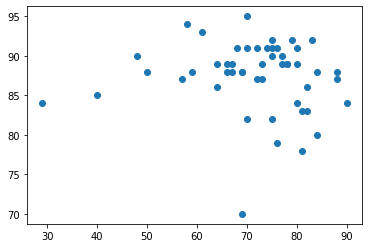

In [14]:
plt.scatter(top50['Danceability'],top50['Popularity'])

Da questo grafico si può notare come nella playlist sia presente un numero predominante di canzoni con un livello di ballabilità alto, però anche la canzone con meno ballabilità ha un valore medio di popolarità, anche se la maggioranza delle canzoni con più ballabilità è più popolare come vediamo dalla densità "di pallini" in alto nel grafico. 

Possiamo anche vedere questo in un unico grafico e trarre le stesse conclusioni:

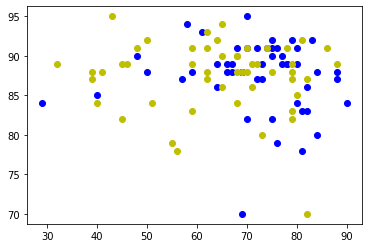

In [15]:
plt.scatter(top50['Danceability'],top50['Popularity'],color='b')
plt.scatter(top50['Energy'],top50['Popularity'],color="y")

***Loudness..dB.. to Popularity***

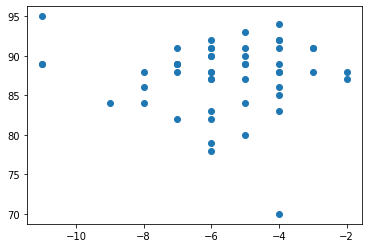

In [16]:
plt.scatter(top50['Loudness..dB..'],top50['Popularity'])

Definition of loudness
: the attribute of a sound that determines the magnitude of the auditory sensation produced and that primarily depends on the amplitude of the sound wave involved.

Detto questo, la canzone con il valore assoluto di loudness maggiore è anche la canzone più popolare, però generalmente non si può dire che all'aumentare di questo valore assoluto aumenti anche la popolarità.


***Liveness  to Popularity***

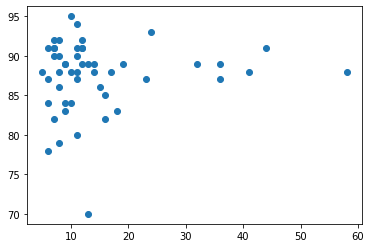

In [17]:
plt.scatter(top50['Liveness'],top50['Popularity'])

Si evince dal grafico che la maggior parte delle canzoni presenti all'interno della playlist hanno una liveness minore di 20, in questo gruppo c'è peraltro la canzone più popolare della playlist.

***Valence to Popularity***

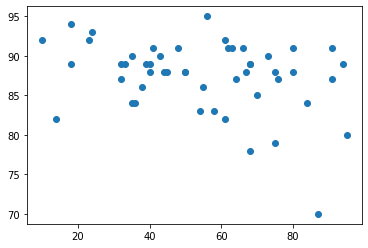

In [18]:
plt.scatter(top50['Valence.'],top50['Popularity'])

La distribuzione dei dati nel grafico sovrastante non ci permette di arrivare a conclusioni che a priori sapevamo ovvero che la popolarità non è legata alla valenza della canzone (sotto si riporta nell'apposita sezione la tabella di correlazione dei dati).

***Length to Popularity***

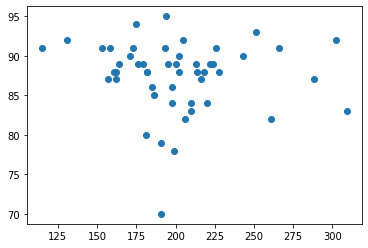

In [19]:
plt.scatter(top50['Length.'],top50['Popularity'])

La maggior parte delle canzoni che sono presenti nella playlist hanno una durata compresa tra i 159 e 225 secondi, tra di queste c'è anche la più popolare. Anche in questo caso comunque non si può nè arrivare alla conclusione che più aumenta la durata e più aumenta la lunghezza della canzone nè viceversa.

***Acousticness to Popularity***

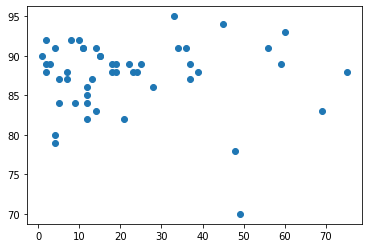

In [20]:
plt.scatter(top50['Acousticness..'],top50['Popularity'])

C'è più coesione nella distribuzione dei dati sulla popolarità delle canzoni con un livello di acousticness compreso tra 0 e 20 quindi la maggior parte delle canzoni nella playlist ha questi valori di acousticness, ma la più popolare si trova nel gruppo restante, dove la varianza della popolarità è notevolmente maggiore, così come il range di acousticness che anch'esso risulta essere più grande(20-80).

***Speechiness to Popularity***

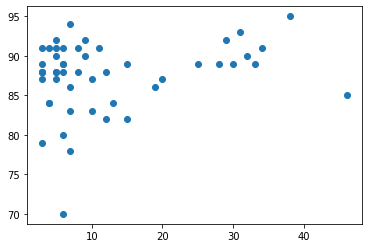

In [21]:
plt.scatter(top50['Speechiness.'],top50['Popularity'])

La maggior parte delle canzoni presenti nella playlist ha un valore di Speechness compreso tra 0 e 10, questo gruppo di canzoni però ha anche una notevole varianza di popolarità, mentre il gruppo restante, dove "risiede" anche la canzone più popolare della playlist ha una varianza di popolarità decisamente inferiore.

***Varianza dei Dati***

Sotto riportiamo il box plot per apprezzare la varianza della mediana del posizionamento di ogni genere, da questo grafico inoltre si evince quali generi presentino la maggior quantità di canzoni e quanto siano distaccati i posizionamenti in classifica di queste:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


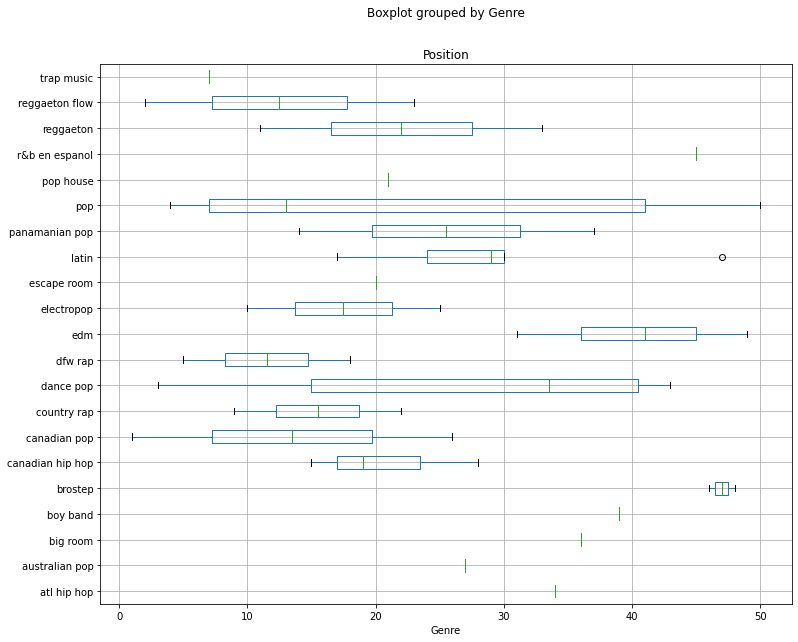

In [22]:
top50.boxplot(column= 'Position', by='Genre', vert=False, fontsize = 10, figsize = (12,10))

Il genere che presenta più varianza nel posizionamento in classifica è il pop seguito non di molto dal dance pop. 
Il primo di questi due -a differenza del secondo- ha la mediana più alta e quindi si evince che ha posizionamenti più alti complessivamente.

Invece per la popolarità media delle canzoni per genere:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


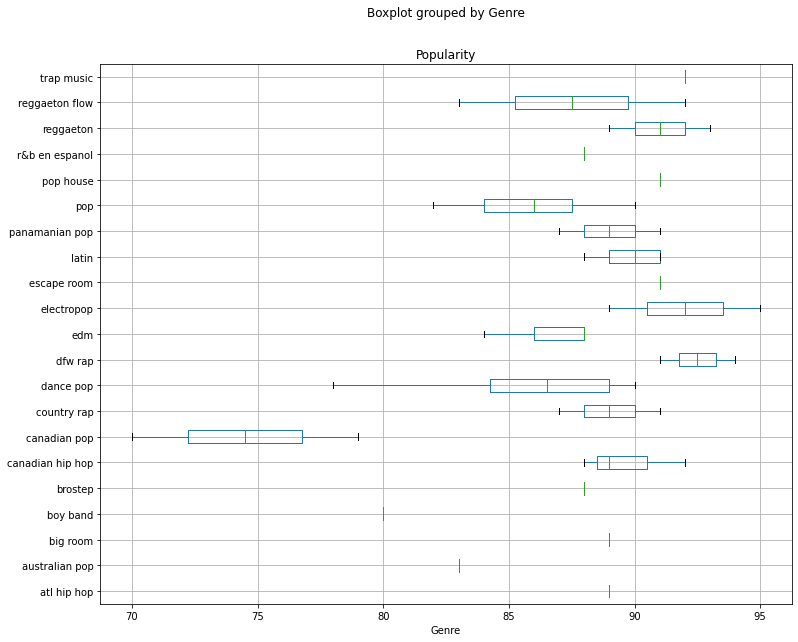

In [23]:
top50.boxplot(column= 'Popularity', by='Genre', vert=False, fontsize = 10, figsize = (12,10))

Il Dance pop è il genere la cui popolarità delle canzoni varia maggiormente, mentre si può notare che il candian pop è il genere dalla popolarità minore.





---



***Correlazione tra i Dati:***

Vediamo innanzitutto l'indice di correlazione di Pearson dei dati presenti nel dataset che stiamo analizzando:

In [24]:
top50.corr()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Position,1.000000,-0.259193,0.102649,0.122691,0.011914,0.270659,0.137329,-0.065844,-0.015993,-0.257506,-0.160680
Beats.Per.Minute,-0.259193,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.102649,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,0.122691,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.011914,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,0.270659,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,0.137329,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.065844,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.015993,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,-0.257506,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553


Da questo possiamo trarre alcune deduzioni da analizzare:

*   La posizione in classifica sembra non essere "affetta" da nessun altra caratteristica/attributo. Solo la liveness arriva ad influire ma veramente poco.
*   Un dato curioso è tra i Beats per Minute e la Specchness : 0.557052, il quale è un valore abbastanza alto di correlazione tra i due attributi/carattersitiche.
*   L'energia di una canzone è correlata abbastanza fortemente con la sua Loudness e un po' di meno con i bpm(in questa playlist).
*   Il mood positivo della canzone è parzialmente influenzato dal numero di bpm della canzone.

In sostanza comunque i dati non sembrano essere molto correlati tra di loro, o per lo meno non sembrano esserci dati "legati" tra loro in modo rigoroso.



**T-Test tra genere Pop e Dance Pop:**

Vediamo ora come eseguire il t-test tra due generi pop(quelli più popolari e presenti in classifica) per confrontare:
1.   quale dei due ha più o meno popolarità media
2.   quale dei due ha più o meno il posizionamento 
medio alto
3.   quale dei due ha più o meno bpm medio





---



**PRECISAZIONE T-TEST**

Quando si calcola il p-value si deve confrontare con il valore di significativita' statistica. 
Quindi, se scegliete una confidenza di 0.95, dovete confrontare il p-value con 0.05. 
In modo analogo per altri valori. 
Questo vale sia per il t-test a una coda, che per il t-test a due code. 
Se il p-value e' maggiore della significativita', accetto l'ipotesi nulla.
Se il p-value e' minore, rigetto l'ipotesi nulla.

---




Dobbiamo partire dal formulare un'ipotesi nulla: 
- la popolarità media in classifca del genere pop è maggiore rispetto al dance pop, quindi l'H alternativa è che il posizionamento medio in classifica del genere pop è minore rispetto al dance pop.

In [25]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean(), alternative="less")
print(t_statistic)
print(p_value)

0.10367452745642448
0.5395969102146674


Dato che abbiamo preso un livello di confidenza di 0.95 dobbiamo accettare l'ipotesi nulla dato che il valore del p-value è notevolmente maggiore di 0.05 che è il nostro livello di significatività.

Ciò detto, comunque, possiamo vedere che dobbiamo accettare l'ipotesi nulla anche se fosse : 
- il posizionamento medio in classifica del genere pop è minore rispetto a quello del genere dance pop 

dato che otteniamo il corrispettivo valore probabilistico e quindi circa 0.46 (l'alternativa sarà dunque "greater")

In [26]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean(), alternative="greater")
print(t_statistic)
print(p_value)

0.10367452745642448
0.46040308978533256


Il caso in cui il test viene fatto con ipotesi nulla:
- il posizionamento medio in classifca del genere pop è uguale rispetto al dance pop

non specificando l'alternative nella funzione del prenderà l'alternativa di default ovvero che siano diversi.

In [27]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean())
print(t_statistic)
print(p_value)

0.10367452745642448
0.9208061795706651


Come ci aspettavamo viene un valore molto alto quindi accettiamo l'ipotesi nulla e quindi la popolarità del genere pop è molto uguale(simile) alla popolarità del dancepop.

Possiamo però notare che questo non avviene nel caso del posizionamento:

In [28]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean())
print(t_statistic)
print(p_value)

-0.6110094553802669
0.5636087300465286


In questo caso l'ipotesi nulla è: 
- il posizionamento medio del genere pop è uguale a quello del genere dance pop.

Possiamo notare come questo valore sia notevolmente inferiore rispetto al t-test precedente sulla stessa condizione analizzando la Popolarità, però bisogna accettarla comunque dato che è superiore al livello di soglia 0.05.

Andando a rifarlo con l'attributo alternative in entrambi i casi:

In [29]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean(), alternative = "greater")
print(t_statistic)
print(p_value)

-0.6110094553802669
0.7181956349767358


In [30]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean(), alternative = "less")
print(t_statistic)
print(p_value)

-0.6110094553802669
0.2818043650232643


Devo accettare le ipotesi nulle in tutti e due i casi analizzando i p-value ottenuti. 

Possiamo però notare come il posizionamento medio in classifica del genere pop sia maggiore rispetto a quello del genere dancepop confrontando proprio questi valori dei p-value ottenuti dai due t-test.


**T-Test tra genere Pop e Canadian Pop**

Incuriosisce la differenza di varianza di popolarità e di posizionamento dei generi pop e canadian pop nonostante appunto risultino sotto la sovracategoria pop.. Analizziamo la correlazione tra i due generi e i valori dei loro attributi estraendo informazioni interessanti.


***- Loudness:***

In [31]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Loudness..dB..'][top50['Genre']=='pop'], popmean= top50['Loudness..dB..'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-2.1213203435596424
0.9609296252943922


Il t-test riporta un p-value notevolmente maggiore del livello di sigificatività 0.05 e quindi accettiamo l'ipotesi nulla:
- La potenza delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

Ciò si può apprezzare meglio dal controesempio utilizzando l'alternativa less:

In [32]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Loudness..dB..'][top50['Genre']=='pop'], popmean= top50['Loudness..dB..'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

-2.1213203435596424
0.03907037470560787


In questo caso, come ci aspettavamo, otteniamo un valore del p-value inferiore al livello di significatività e quindi scartiamo l'ipotesi nulla sopra riportata a favore dell'ipotesi alternativa:
- La potenza delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è minore di 0.05.

***- Liveness:***

In [33]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Liveness'][top50['Genre']=='pop'], popmean= top50['Liveness'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

0.4086347063482532
0.3484960847425449


Confermiamo l'ipotesi nulla:
- La liveness delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

Anche se eseguendo il t-test complementare:

In [34]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Liveness'][top50['Genre']=='pop'], popmean= top50['Liveness'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

0.4086347063482532
0.6515039152574551


Si nota che si ottiene un valore del p-vlaue di 0.65 con l'alternativa greater e che quindi dobbiamo confermare l'ipotesi nulla:
- La liveness delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

Possiamo quindi concludere che questa affermazione è confermata maggiormente rispetto alla precedente proprio confrontando i valori dei p-value ottenuti con i t-test eseguiti.

Quindi si può dire complessivamente che la Liveness delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop. 

Ragioneremo così di conseguenza per tutti gli altri t-test con valori simili.

***- BPM:***

In [35]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Beats.Per.Minute'][top50['Genre']=='pop'], popmean= top50['Beats.Per.Minute'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-0.7651969130815115
0.7634156949583331


I BPM è sono notevolmente maggiori nel genere canadian pop rispetto al pop, siccome viene confermata l'ipotesi nulla:
- i BPM del genere pop sono minori rispetto a quelli del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Energy:***

In [36]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Energy'][top50['Genre']=='pop'], popmean= top50['Energy'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-0.8236109703919069
0.779169615459225


L'Energia è notevolmente maggiore nel genere canadian pop rispetto al pop, siccome viene confermata l'ipotesi nulla:
- L' energia delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Valence:***

In [37]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Valence.'][top50['Genre']=='pop'], popmean= top50['Valence.'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-2.716872346805644
0.9826065130631729


In [38]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Valence.'][top50['Genre']=='pop'], popmean= top50['Valence.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

-2.716872346805644
0.017393486936827105


La "valenza" della canzone è notevolmente maggiore nel genere canadian pop rispetto al pop.

In questo caso possiamo apprezzare maggiormente con le due alternative questa conclusione:
- con l'alternativa greater accettiamo l'ipotesi nulla: 
    - la valenza del genere pop è minore di quella del genere canadian pop dato che il p-value ottenuto con il t-test è notevolmente maggiore di 0.05.
- con l'alternativa less dobbiamo scartare l'ipotesi nulla: 
  - la valenza del genere pop è maggiore di quella del genere canadian pop, dato che il p-value ottenuto con il t-test è inferiore di 0.05.

***- Lunghezza:***

In [39]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Length.'][top50['Genre']=='pop'],popmean= top50['Length.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

0.6308601579817562
0.7243050674426822


Risulta che le canzoni del genere pop siano più lunghe mediamente di quelle del genere canadian pop, siccome viene confermata l'ipotesi nulla:
- La lunghezza media delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Acousticness:***

In [40]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Acousticness..'][top50['Genre']=='pop'], popmean= top50['Acousticness..'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-0.5558876090713705
0.7008053704370074


La "acusticità" della canzone è notevolmente maggiore nel genere canadian pop rispetto al pop, siccome viene confermata l'ipotesi nulla:
- L'acusticità media delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Parole differenti usate all'interno della canzone(Speechness):***

In [41]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Speechiness.'][top50['Genre']=='pop'], popmean= top50['Speechiness.'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

2.1852990447290317
0.03576840836614951


La media delle parole differenti usate all'interno della canzone è notevolmente minore nel genere canadian pop rispetto al pop, siccome dobbiamo rigettare l'ipotesi nulla:
- La media delle parole differenti usate all'interno delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è minore di 0.05.

***Divagazione:*** 

Che sia proprio questa l'arma vincente del genere pop rispetto al canadian pop?

Il "saper usare" più termini ma riuscire a fare comunque hit da posti più alti in classifica nella top50?

In [42]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Speechiness.'][top50['Genre']=='pop'], popmean= top50['Speechiness.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

2.1852990447290317
0.9642315916338505



Il contro-esempio sopra riportato(t-test con alternative='less') ci mostra ancora meglio quanto detto prima, confermiamo l'ipotesi nulla:
- La media delle parole differenti usate all'interno delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.